# 情感曲线可视化

## 预设

### 导入库

In [118]:
import sys
sys.path.append("..")
import pandas as pd
import time
from utils import *
import matplotlib.pyplot as plt
import matplotlib

### 全局参数

In [119]:
DataFilePath = '../data/subtitle6_sentiment.pkl'

### 全局设置

In [120]:
# 支持中文
print(matplotlib.matplotlib_fname())
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    if 'Song' in i:
        print(i)
plt.rcParams['font.sans-serif'] = ['Songti SC'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 显示清晰
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/zackyule/.pyenv/versions/3.11.0/envs/NLP_basic/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
Songti SC


## 函数工具

In [121]:
def time_cut(df, time_column_name, time_step = 1000):
    bin = range(0, df[time_column_name].iloc[-1]+time_step, time_step)
    df.loc[:,f'{time_column_name}_group']=pd.cut(df[time_column_name],bin,right=False)
    return df

In [122]:
## data frame前后线性插值
def fill_na_to_df_by_interpolate(df):
    for column_name in df.columns:
        df[column_name].fillna(df[column_name].interpolate(),inplace=True)
    return df

## 数据读取

In [123]:
sentiment_data = pd.read_pickle(DataFilePath)

In [124]:
sentiment_data = sentiment_data[sentiment_data['confidence'].notna()]

## 数据处理

In [129]:
sentiment_data['time'] = pd.to_timedelta(sentiment_data['progress_end'].apply(pd.offsets.Milli))

In [134]:
sentiment_data.set_index('time', inplace=True)

In [138]:
sentiment_data = sentiment_data[['confidence','negative_prob','positive_prob','sentiment']]

In [145]:
sentiment_rolling_data = sentiment_data.rolling(window='30s').mean()

In [144]:
sentiment_data[sentiment_data['confidence'].notna()]

,confidence,negative_prob,positive_prob,sentiment
time,,,,
0 days 00:00:03,0.840611,0.071725,0.928275,2
0 days 00:00:09.276000,0.989679,0.004644,0.995356,2
0 days 00:00:14.047000,0.839889,0.072050,0.927950,2
0 days 00:00:17.217000,0.998121,0.000846,0.999154,2
0 days 00:00:26.158000,0.605596,0.822518,0.177482,0
...,...,...,...,...
0 days 00:58:02.902000,0.810417,0.509479,0.490521,1
0 days 00:58:08.507000,0.997684,0.001042,0.998958,2
0 days 00:58:13.077000,0.293115,0.535344,0.464656,1


### 区间划分

In [105]:
sentiment_data = time_cut(sentiment_data, 'progress', 10*1000)

In [106]:
sentiment_mean = sentiment_data.groupby('progress_group')[['confidence','negative_prob','positive_prob','sentiment']].agg('mean')

In [107]:
sentiment_count = sentiment_data.groupby('progress_group').agg('count')

In [108]:
sentiment_statistics_data = sentiment_mean.join(sentiment_count.iloc[:,1])

### 滑动窗口

In [113]:
sentiment_statistics_data = fill_na_to_df_by_interpolate(sentiment_statistics_data)

In [115]:
sentiment_statistics_data = sentiment_statistics_data.rolling(window=5).mean()

## 数据展示

In [132]:
sentiment_data#.dtypes#[sentiment_statistics_data['confidence'].notna()]

,content,progress,progress_end,confidence,negative_prob,positive_prob,sentiment,time
0,节目 2008\n字幕 2019,0,3000,0.840611,0.071725,0.928275,2,0 days 00:00:03
1,从万里长城的最东端起,6073,9276,0.989679,0.004644,0.995356,2,0 days 00:00:09.276000
2,"中国的海岸线绵延14,500公里",9376,14047,0.839889,0.072050,0.927950,2,0 days 00:00:14.047000
3,并且拥有五千多年的历史,14281,17217,0.998121,0.000846,0.999154,2,0 days 00:00:17.217000
4,这里呈现出中国的过去\n与未来之间的极大反差,20020,26158,0.605596,0.822518,0.177482,0,0 days 00:00:26.158000
...,...,...,...,...,...,...,...,...
558,那就非中国莫属,3480800,3482902,0.810417,0.509479,0.490521,1,0 days 00:58:02.902000
559,因为它拥有庞大的人力资源\n和强大的政治权力,3483402,3488507,0.997684,0.001042,0.998958,2,0 days 00:58:08.507000
560,她选择的道路不仅会影响中国人,3488640,3493077,0.293115,0.535344,0.464656,1,0 days 00:58:13.077000
561,和中国的自然环境,3493150,3495952,0.732604,0.120328,0.879672,2,0 days 00:58:15.952000


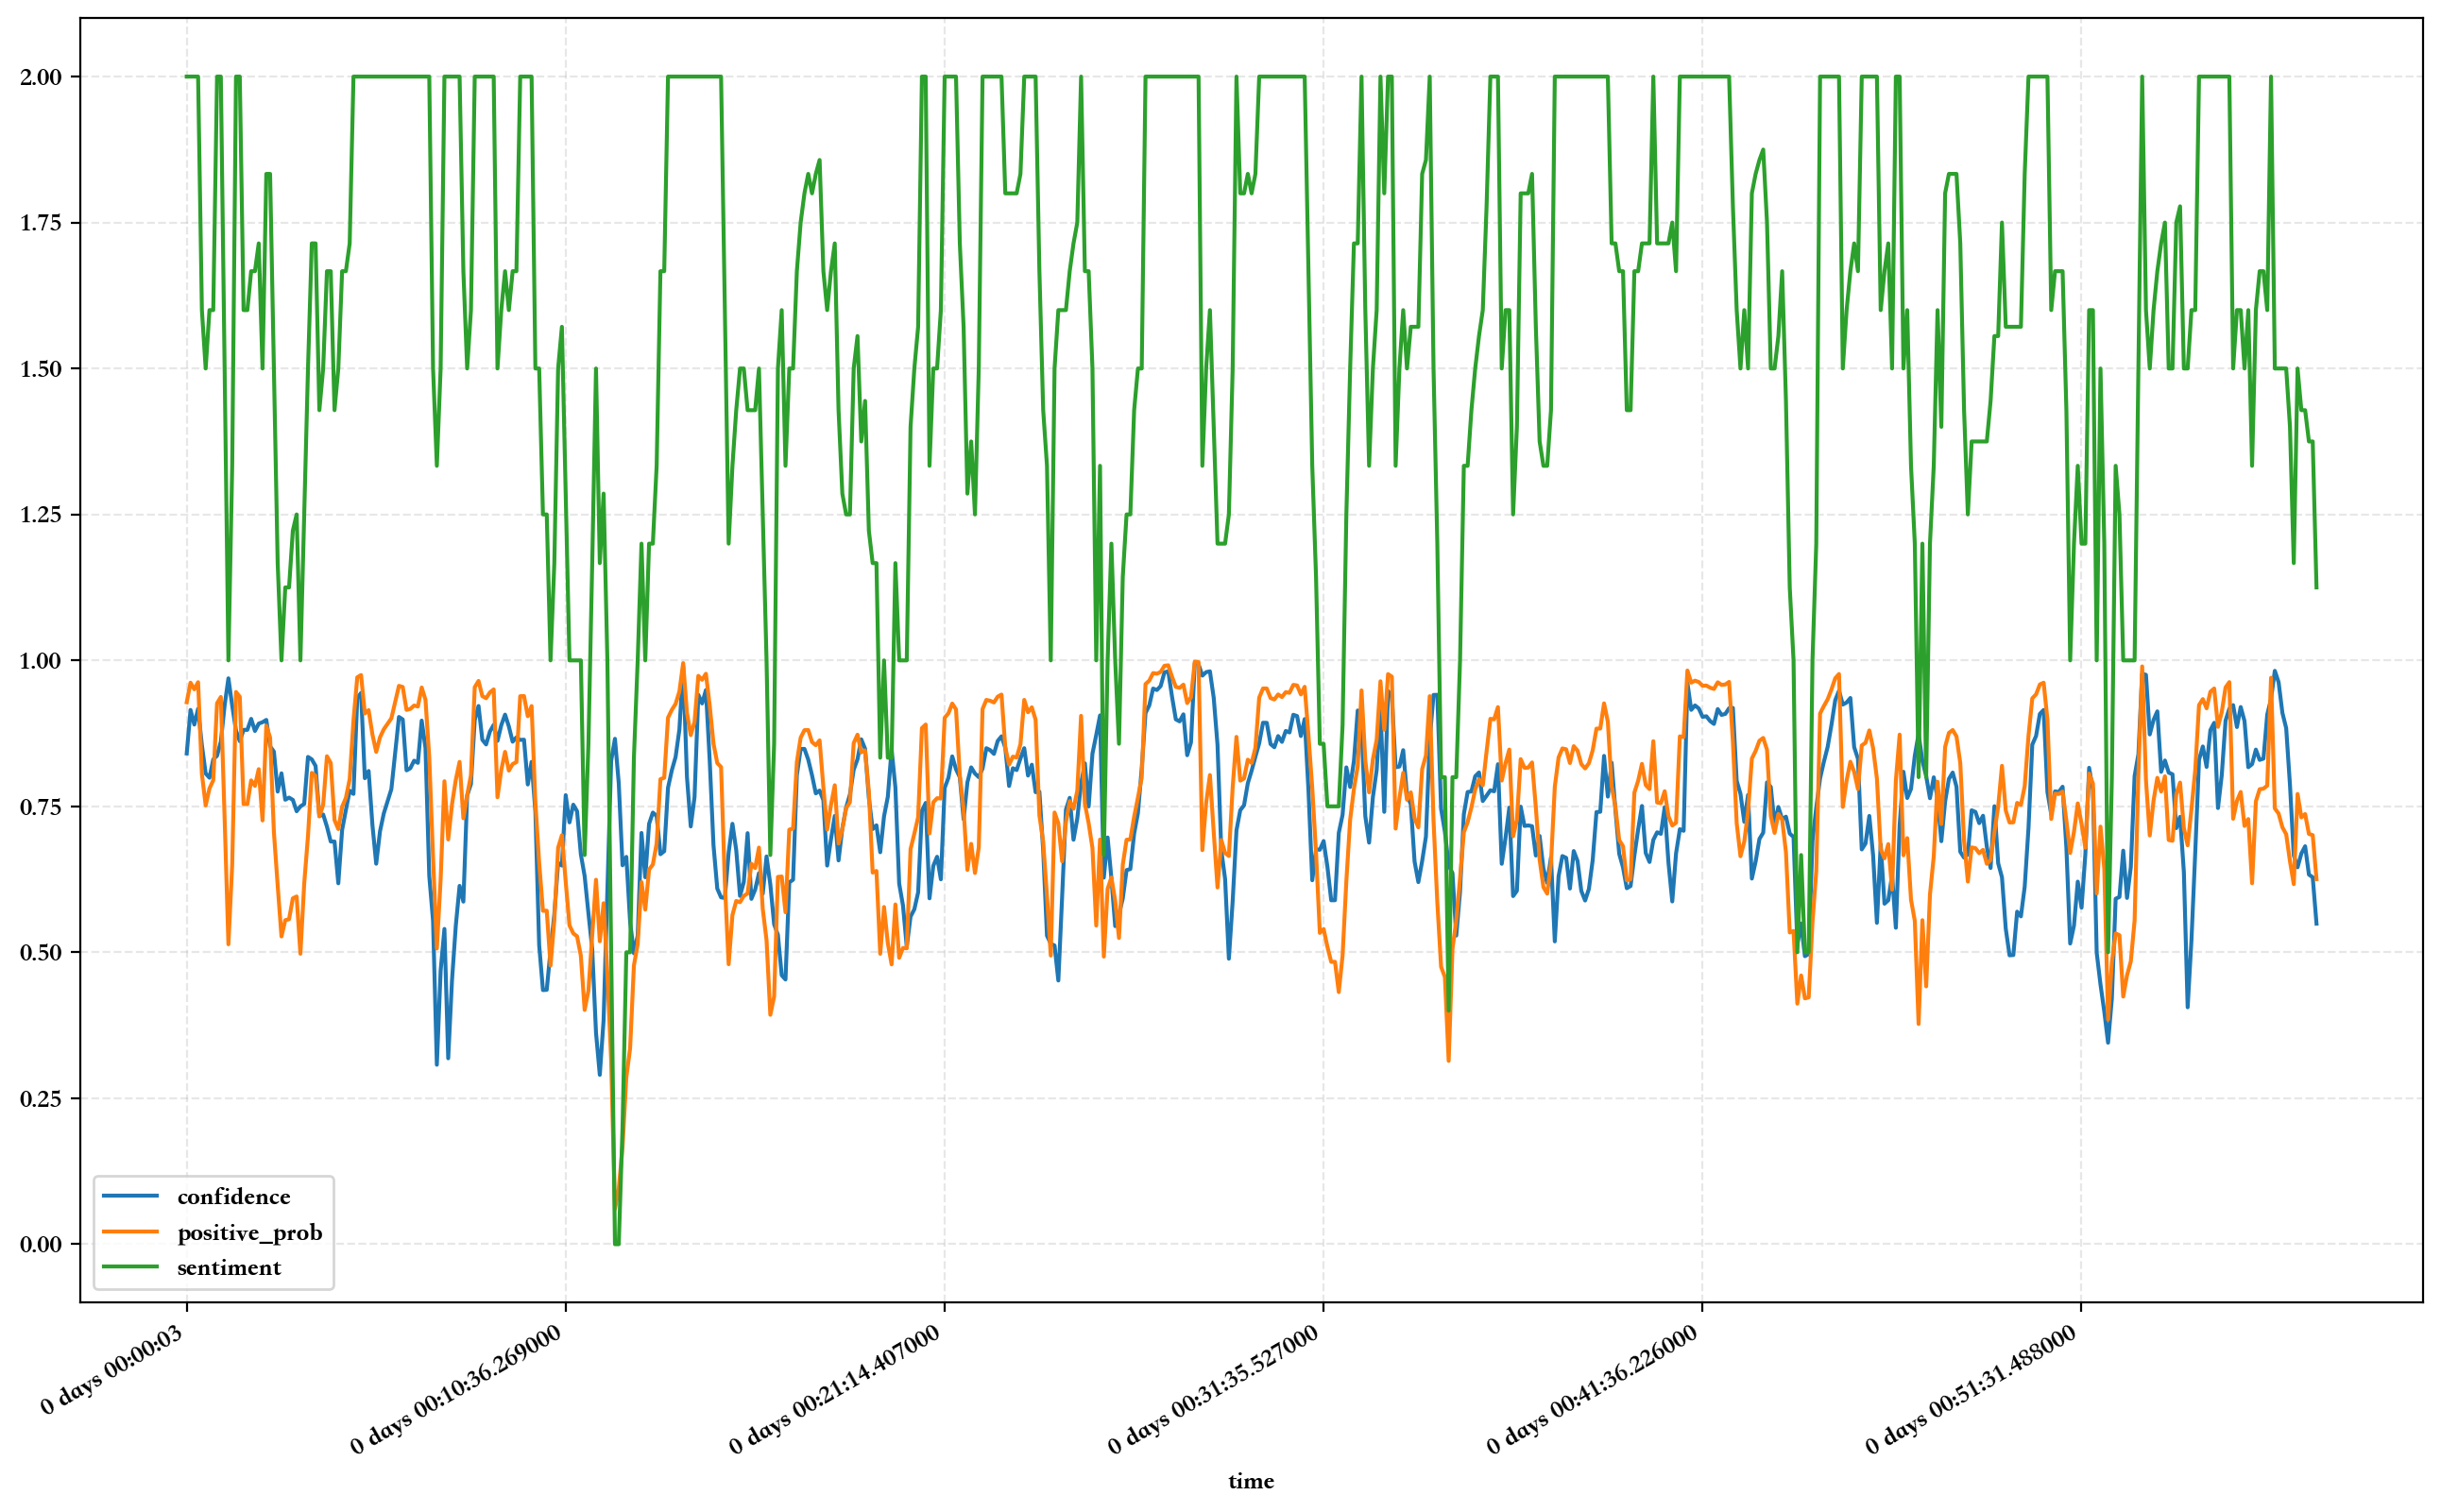

In [146]:
ax = sentiment_rolling_data.loc[:, ['confidence','positive_prob','sentiment']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.show()

## 数据保存

## 测试&playground